# Importing Libraries

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization,Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img,img_to_array

In [4]:
train_directory='../input/100-bird-species/train'
val_directory='../input/100-bird-species/valid'
test_directory='../input/100-bird-species/test'

In [5]:
train_datagen=ImageDataGenerator(rescale=1/255)
val_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

In [6]:
train_generator=train_datagen.flow_from_directory(train_directory,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 class_mode='sparse',batch_size=256)

val_generator=val_datagen.flow_from_directory(val_directory,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 class_mode='sparse',batch_size=256)

test_generator=test_datagen.flow_from_directory(test_directory,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 class_mode='sparse',batch_size=256)

Found 37815 images belonging to 265 classes.
Found 1325 images belonging to 265 classes.
Found 1325 images belonging to 265 classes.


In [7]:
from keras.applications import ResNet101V2
convlayer=ResNet101V2(input_shape=(224,224,3),weights='imagenet',include_top=False)
convlayer.trainable = False

171319296/171317808 [==============================] - 2s 0us/step


In [8]:
model=Sequential()
model.add(convlayer)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(265,activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101v2 (Functional)     (None, 7, 7, 2048)        42626560  
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 2048)        0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 100352)            401408    
_________________________________________________________________
dense (Dense)                (None, 2048)              205522944 
_________________________________________________________________
batch_normalization_1 (Batch (None, 2048)              8192      
_________________________________________________________________
activation (Activation)      (None, 2048)              0

In [9]:
opt=tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer=opt)

In [10]:
history=model.fit(train_generator,validation_data=val_generator,
         epochs=5)

Epoch 1/5
148/148 [==============================] - 376s 2s/step - loss: 3.4827 - accuracy: 0.3333 - val_loss: 0.3554 - val_accuracy: 0.9004
Epoch 2/5
148/148 [==============================] - 152s 1s/step - loss: 0.4724 - accuracy: 0.8878 - val_loss: 0.2311 - val_accuracy: 0.9502
Epoch 3/5
148/148 [==============================] - 151s 1s/step - loss: 0.1758 - accuracy: 0.9627 - val_loss: 0.1954 - val_accuracy: 0.9509
Epoch 4/5
148/148 [==============================] - 154s 1s/step - loss: 0.0826 - accuracy: 0.9831 - val_loss: 0.1779 - val_accuracy: 0.9570
Epoch 5/5
148/148 [==============================] - 153s 1s/step - loss: 0.0512 - accuracy: 0.9902 - val_loss: 0.1588 - val_accuracy: 0.9532


In [21]:
opt=tf.keras.optimizers.RMSprop(lr=0.0001)
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer=opt)
history_1=model.fit(train_generator,validation_data=val_generator,
         epochs=5)

Epoch 1/5
148/148 [==============================] - 177s 1s/step - loss: 0.0308 - accuracy: 0.9943 - val_loss: 0.1581 - val_accuracy: 0.9600
Epoch 2/5
148/148 [==============================] - 135s 908ms/step - loss: 0.0210 - accuracy: 0.9969 - val_loss: 0.1453 - val_accuracy: 0.9630
Epoch 3/5
148/148 [==============================] - 138s 933ms/step - loss: 0.0145 - accuracy: 0.9977 - val_loss: 0.1445 - val_accuracy: 0.9645
Epoch 4/5
148/148 [==============================] - 142s 957ms/step - loss: 0.0115 - accuracy: 0.9986 - val_loss: 0.1478 - val_accuracy: 0.9585
Epoch 5/5
148/148 [==============================] - 150s 1s/step - loss: 0.0087 - accuracy: 0.9989 - val_loss: 0.1487 - val_accuracy: 0.9608


In [ ]:
plt.plot(history.history['accuracy'],c='red')
plt.plot(history.history['val_accuracy'],c='green')
plt.title('Accuracy: ResNet101V2 with tensorflow')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='lower right')
plt.savefig('tf_accuracy.png')

# Loss Plot

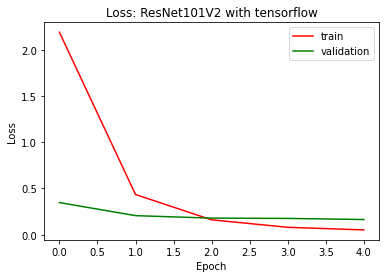

In [39]:
plt.plot(history.history['loss'],c='red')
plt.plot(history.history['val_loss'],c='green')
plt.title('Loss: ResNet101V2 with tensorflow')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='upper right')
plt.savefig('tf_loss.png')

In [11]:
model.evaluate(test_generator)

6/6 [==============================] - 11s 2s/step - loss: 0.1285 - accuracy: 0.9623


[0.12848857045173645, 0.9622641801834106]

In [12]:
dic=train_generator.class_indices
icd={k:v for v,k in dic.items()}
def pred(pic):
    img=load_img(pic,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict_classes(img)
    probability=round(np.max(model.predict_proba(img)*100),2)
    #print ('Bird Is',icd[answer[0]], 'With probability',probability)
    print (probability, ' % chances are there that the Bird Is',icd[answer[0]])

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


99.79  % chances are there that the Bird Is BARN SWALLOW


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


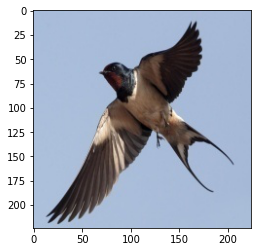

In [13]:
img='../input/100-bird-species/train/BARN SWALLOW/001.jpg'
pic=load_img('../input/100-bird-species/train/BARN SWALLOW/001.jpg',target_size=(224,224,3))
plt.imshow(pic)
pred(img)

99.69  % chances are there that the Bird Is ANTBIRD


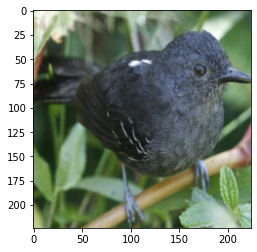

In [28]:
img='../input/100-bird-species/train/ANTBIRD/001.jpg'
pic=load_img('../input/100-bird-species/train/ANTBIRD/001.jpg',target_size=(224,224,3))
plt.imshow(pic)
pred(img)

100.0  % chances are there that the Bird Is BIRD OF PARADISE


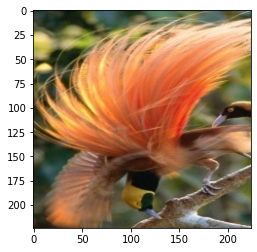

In [29]:
img='../input/100-bird-species/train/BIRD OF PARADISE/002.jpg'
pic=load_img('../input/100-bird-species/train/BIRD OF PARADISE/002.jpg',target_size=(224,224,3))
plt.imshow(pic)
pred(img)

### Model Explainability on ResNet101V2 Tensorflow model using Integrated Gradients

In [16]:
pip install alibi

     |████████████████████████████████| 307 kB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 93.8 MB 94 kB/s s eta 0:00:01
  Created wheel for spacy-lookups-data: filename=spacy_lookups_data-0.3.2-py2.py3-none-any.whl size=93807573 sha256=c05fcd21a49127237811b6125b18a378d2d6859648380253f66c088f5f8b0e53
  Stored in directory: /root/.cache/pip/wheels/53/c2/ca/b2496a732bb10cc3d4adea066bb3f9f427fb22a4df7aebbd76
Successfully built spacy-lookups-data
Note: you may need to restart the kernel to use updated packages.


#### Import Libraries

In [17]:
from alibi.explainers import IntegratedGradients
#from alibi.datasets import load_cats
from alibi.utils.visualization import visualize_image_attr
print('TF version: ', tf.__version__)
print('Eager execution enabled: ', tf.executing_eagerly()) # True

TF version:  2.4.1
Eager execution enabled:  True


#### Calculate integrated gradients

The IntegratedGradients class implements the integrated gradients features attributions method.

In the first example, the baselines (i.e. the starting points of the path integral) are black images (all pixel values are set to zero). This means that black areas of the image will always have zero attributions. In the second example we consider random uniform noise baselines. The path integral is defined as a straight line from the baseline to the input image. The path is approximated by choosing 50 discrete steps according to the Gauss-Legendre method.

In [18]:
n_steps = 50
method = "gausslegendre"
internal_batch_size = 50
ig  = IntegratedGradients(model,
                          n_steps=n_steps,
                          method=method,
                          internal_batch_size=internal_batch_size)

In [19]:
ig

IntegratedGradients(meta={
  'name': 'IntegratedGradients',
  'type': ['whitebox'],
  'explanations': ['local'],
  'params': {
              'method': 'gausslegendre',
              'n_steps': 50,
              'internal_batch_size': 50,
              'layer': 0}
            }
)

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


100.0  % chances are there that the Bird Is BIRD OF PARADISE


`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


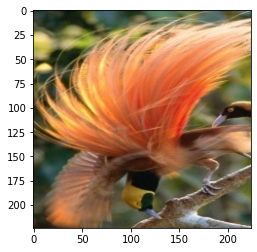

In [20]:
img='../input/100-bird-species/test/ANTBIRD/1.jpg'
pic=load_img('../input/100-bird-species/test/ANTBIRD/1.jpg',target_size=(224,224,3))
plt.imshow(pic)
pred(img)

#### Here we compute attributions for a single image.

In [22]:
instance = np.expand_dims(pic, axis=0)
predictions = model(instance).numpy().argmax(axis=1)
explanation = ig.explain(instance,
                         baselines=None,
                         target=predictions)

In [24]:
# Metadata from the explanation object
explanation.meta

{'name': 'IntegratedGradients',
 'type': ['whitebox'],
 'explanations': ['local'],
 'params': {'method': 'gausslegendre',
  'n_steps': 50,
  'internal_batch_size': 50,
  'layer': 0}}

In [25]:
# Data fields from the explanation object
explanation.data.keys()

dict_keys(['attributions', 'X', 'baselines', 'predictions', 'deltas', 'target'])

In [26]:
# Get attributions values from the explanation object
attrs = explanation.attributions[0]

### Visualize attributions

#### Black image baseline

##### Sample image from the test set and its attributions. The attributions are shown by overlaying the attributions values for each pixel to the original image. The attribution value for a pixel is obtained by summing up the attributions values for the three color channels. The attributions are scaled in a [−1,1] range: red pixels represent negative attributions, while green pixels represent positive attributions. The original image is shown in gray scale for clarity.

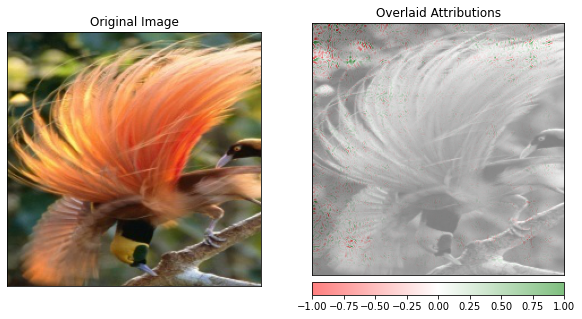

<Figure size 432x288 with 0 Axes>

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
visualize_image_attr(attr=None, original_image=pic, method='original_image',
                    title='Original Image', plt_fig_axis=(fig, ax[0]), use_pyplot=False);

visualize_image_attr(attr=attrs.squeeze(), original_image=pic, method='blended_heat_map',
                    sign='all', show_colorbar=True, title='Overlaid Attributions',
                     plt_fig_axis=(fig, ax[1]), use_pyplot=True);
plt.savefig('explanation1.png')

93.07  % chances are there that the Bird Is ASIAN CRESTED IBIS


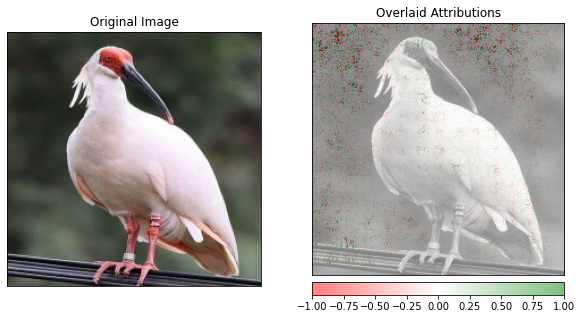

In [42]:
img='../input/100-bird-species/test/ASIAN CRESTED IBIS/1.jpg'
pic=load_img('../input/100-bird-species/test/ASIAN CRESTED IBIS/1.jpg',target_size=(224,224,3))
#plt.imshow(pic)
pred(img)


instance = np.expand_dims(pic, axis=0)
predictions = model(instance).numpy().argmax(axis=1)
explanation = ig.explain(instance,
                         baselines=None,
                         target=predictions)

# Metadata from the explanation object
explanation.meta

# Data fields from the explanation object
explanation.data.keys()

# Get attributions values from the explanation object
attrs = explanation.attributions[0]

#Black image baseline

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
visualize_image_attr(attr=None, original_image=pic, method='original_image',
                    title='Original Image', plt_fig_axis=(fig, ax[0]), use_pyplot=False);

visualize_image_attr(attr=attrs.squeeze(), original_image=pic, method='blended_heat_map',
                    sign='all', show_colorbar=True, title='Overlaid Attributions',
                     plt_fig_axis=(fig, ax[1]), use_pyplot=True);

### Random baselines

Here we show the attributions obtained choosing random uniform noise as a baseline. It can be noticed that the attributions can be considerably different from the previous example, where the black image is taken as a baseline. An extensive discussion about the impact of the baselines on

In [28]:
baselines = np.random.random_sample(instance.shape)

In [29]:
explanation = ig.explain(instance,
                         baselines=baselines,
                         target=predictions)

In [30]:
attrs = explanation.attributions[0]

##### Sample image from the test dataset and its attributions. The attributions are shown by overlaying the attributions values for each pixel to the original image. The attribution value for a pixel is obtained by summing up the attributions values for the three color channels. The attributions are scaled in a [−1,1] range: red pixel represents negative attributions, while green pixels represents positive attributions. The original image is shown in gray scale for clarity.

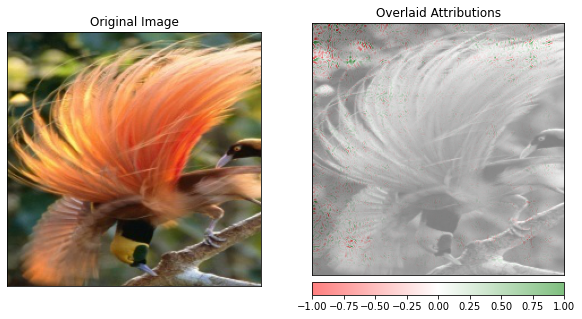

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
visualize_image_attr(attr=None, original_image=pic, method='original_image',
                    title='Original Image', plt_fig_axis=(fig, ax[0]), use_pyplot=False);

visualize_image_attr(attr=attrs.squeeze(), original_image=pic, method='blended_heat_map',
                    sign='all', show_colorbar=True, title='Overlaid Attributions',
                     plt_fig_axis=(fig, ax[1]), use_pyplot=True);